# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Rohan Athalye
### Student ID: 014099982
### Email address: rohan.athalye@sjsu.edu

##  <u>References and sources </u>

SVM.Breast.ipynb from Canvas under Files/Example Jupyter Notebooks

SVM.Iris.ipynb from Canvas under Files/Example Jupyter Notebooks

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://www.datacamp.com/tutorial/principal-component-analysis-in-python

https://stephenallwright.com/cross_val_score-sklearn/

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [2]:
np.random.seed(42)

#### Code the solution

#### Load the dataset

In [3]:
# Mounts Google Drive in Google Colab.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
csv_file = "/content/drive/MyDrive/Fall 2022/CS 156/Homework/Homework 4/homework4_input_data.csv"
cancer_df = pd.read_csv(csv_file)
X = cancer_df.iloc[:, 1:3001] # Gets input data.
Y = cancer_df["Class"] # Gets class labels.

#### Produce a PCA plot of the input data

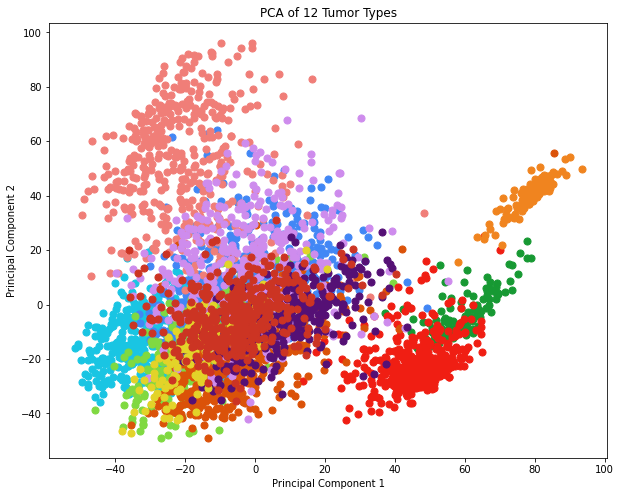

In [5]:
# Colors for the PCA plot.
colors = {"Bladder": '#19c5e3',
          "Breast": '#4287f5',
          "Colon": '#80d941',
          "Glioblastoma": '#179933',
          "Head&Neck": '#f07e78',
          "Kidney": '#f01e13',
          "Leukemia": '#f0841f',
          "LungAdeno": '#db5209',
          "LungSquamous": '#ce8ced',
          "Ovarian": '#551075',
          "Rectal": '#e3d329',
          "Uterine": '#cc3423'}

# Projects the cancer data to 2 dimensions for PCA and stores it in a dataframe.
pca_cancer = PCA(n_components=2)
principalComponents_cancer = pca_cancer.fit_transform(X)
principal_cancer_df = pd.DataFrame(data=principalComponents_cancer, columns=['Principal Component 1', 'Principal Component 2'])

# Produces the PCA plot.
plt.figure(figsize=(10,8))
plt.title("PCA of 12 Tumor Types")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for cancer_type in colors:
  indices = cancer_df['Class'] == cancer_type
  plt.scatter(principal_cancer_df.loc[indices, 'Principal Component 1'], principal_cancer_df.loc[indices, 'Principal Component 2'], c=colors[cancer_type], s=50)

#### Normalize the data using StandardScaler

In [6]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

#### Split the data into training and test sets

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify=Y)

#### Define SVM model hyperparameters

In [8]:
model = LinearSVC(multi_class="ovr", class_weight="balanced").fit(X_train,Y_train)

#### Run and report results from 5-fold cross validation

In [12]:
cross_val_scores = cross_val_score(model, X_train, Y_train) # Gets accuracies for each fold.
print("Individual cross-validation accuracies:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean()) # Gets average accuracy across all folds.

Individual cross-validation accuracies: [0.96 0.97 0.96 0.97 0.97]
Mean cross-validation accuracy: 0.9639574002686395


#### Train the final model on all the training data and assess model performance on the test set

In [10]:
print('Accuracy of Linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train) * 100))
print('Accuracy of Linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test) * 100))

Accuracy of Linear SVC on training set: 100.00
Accuracy of Linear SVC on test set: 97.58


#### Plot 2 confusion matrices for test set predictions (1 non-normalized and 1 normalized)

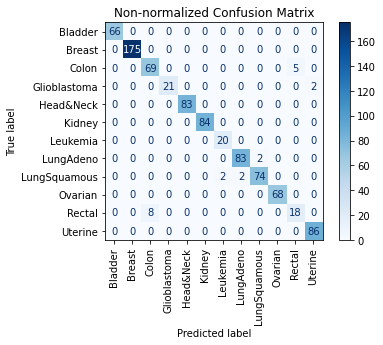

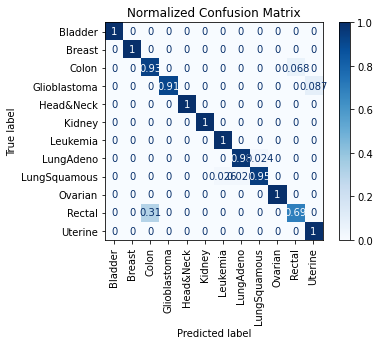

In [11]:
np.set_printoptions(precision=2)
titles_options = [("Non-normalized Confusion Matrix", None), ("Normalized Confusion Matrix", 'true')]
class_names = list(cancer_df["Class"].unique()) # Gets a list of the unique class names.
class_names.sort() # Sorts the list of unique class names.

# Plots confusion matrices.
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test, xticks_rotation='vertical', display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

plt.show()